In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy.linalg as la

In [7]:
def psi1D(n,x,L):
    return sqrt(2/L)*sin(n*math.pi*x/L)
def energy1D(n,L):
    return math.pi*math.pi*n*n/(2*L*L)

def integrate(x,y):
    result=0
    for i in range(1,nPoints,1):
        temp=(y[i]+y[i-1])/2*(x[i]-x[i-1])
        result+=temp
    return result

In [8]:
nPoints=100
L=5
a=L/(nPoints+1)
t=1/(2*a*a)
def V(x):
    return 0

hMat=np.zeros((nPoints,nPoints))

for i in range(nPoints):
    for j in range(nPoints):
        if i==j:
            hMat[i][j]=V(i)+2*t
        elif i==j+1 or i==j-1:
            hMat[i][j]=-t
        else:
            hMat[i][j]=0

eigen,eigenv=la.eig(hMat)
eigen=np.sort(eigen)
print(hMat)
print(eigen[0])

[[ 408.04 -204.02    0.   ...    0.      0.      0.  ]
 [-204.02  408.04 -204.02 ...    0.      0.      0.  ]
 [   0.   -204.02  408.04 ...    0.      0.      0.  ]
 ...
 [   0.      0.      0.   ...  408.04 -204.02    0.  ]
 [   0.      0.      0.   ... -204.02  408.04 -204.02]
 [   0.      0.      0.   ...    0.   -204.02  408.04]]
0.1973761735771728


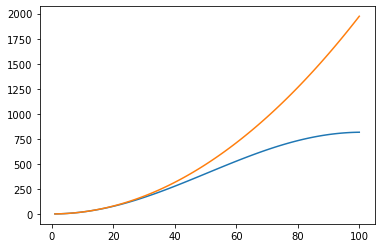

In [9]:
x=range(1,nPoints+1)
energy=np.array([])
for i in x:
    energy=np.append(energy,[energy1D(i,L)])
    
plt.plot(x,eigen)
plt.plot(x,energy)

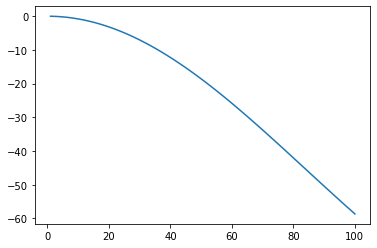

In [10]:
error=np.array([])

for i in range(nPoints):
    error=np.append(error,[(eigen[i]-energy[i])/energy[i]*100])
    
plt.plot(x,error)

In [15]:
eigenv1=eigenv[4]/math.sqrt(a)

for i in range(nPoints):
    eigenv1=

print("{0:.2f}".format(integrate(x,eigenv1)))

-4.60
